# EDA on TITANIC DATASET

In [89]:
df = pd.read_csv('C:\\Users\\Snehal Sanap\\OneDrive\\Desktop\\AIML_STUDY\\Supervised Learning\\EDA_titanic_dataset\\titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Descriptive Stats / EDA

In [90]:
df.info()
# 7 -num cols out of which 1 col Age has NA 
# 5 cat cols out of which 2 col Cabin n Embarked has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
for i in df.columns:
    print(i +  '   -->   {}     {}% NA values'.format(df[i].isnull().sum(), np.round(df[i].isnull().mean(),2)))

PassengerId   -->   0     0.0% NA values
Survived   -->   0     0.0% NA values
Pclass   -->   0     0.0% NA values
Name   -->   0     0.0% NA values
Sex   -->   0     0.0% NA values
Age   -->   177     0.2% NA values
SibSp   -->   0     0.0% NA values
Parch   -->   0     0.0% NA values
Ticket   -->   0     0.0% NA values
Fare   -->   0     0.0% NA values
Cabin   -->   687     0.77% NA values
Embarked   -->   2     0.0% NA values


In [92]:
df[~df.apply(np.isreal).all(1)] #no non real values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [93]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#pclass : mean< median : slightly keft skewed
#age : NA values present ; avg age of passenger obnboard : 29yrs ; assumed in usniverse to be normal distributed but is slightly right skewed
    #mean>median ;  lowest age 0.42 i.e. infabnt on board  & highest age :80yrs person
#Sibsscp : mean>median-right skewed ; 0-8 sibspsc
#fare : mean > median and huge diffeence b/w max and 75% --.fairly right skewed data

In [94]:
df.skew()
#sibsp, parch, fare +ve and >1 values : skewed rightly

<ipython-input-94-6a018acf4298>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [95]:
df.kurtosis()

<ipython-input-95-c7edf97eb14c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

In [96]:
## visualizing Missing values
!pip install missingno

<AxesSubplot:>

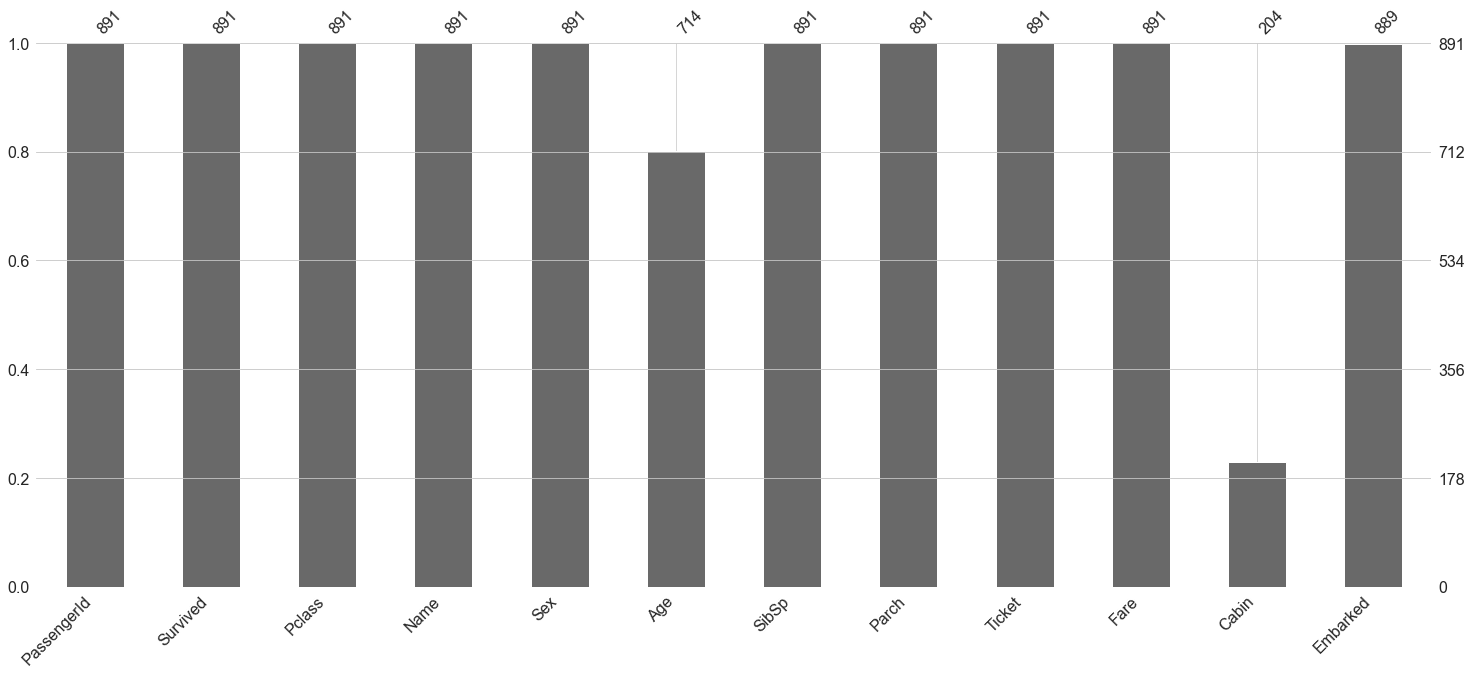

In [97]:
import missingno as msno
msno.bar(df)
#bars how non null values in column which also indcates presence of and how amny null values
#age and cabin NA values mostyly cabin

<AxesSubplot:>

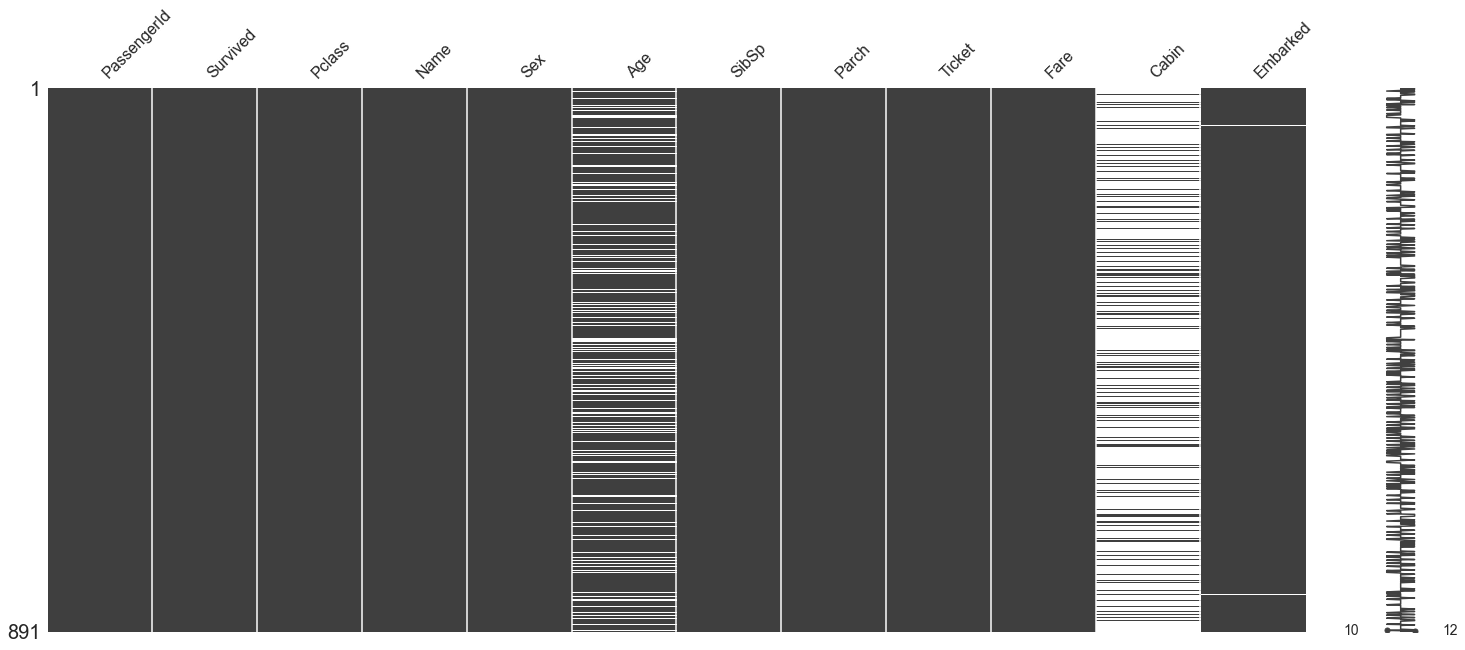

In [98]:
msno.matrix(df)

<AxesSubplot:>

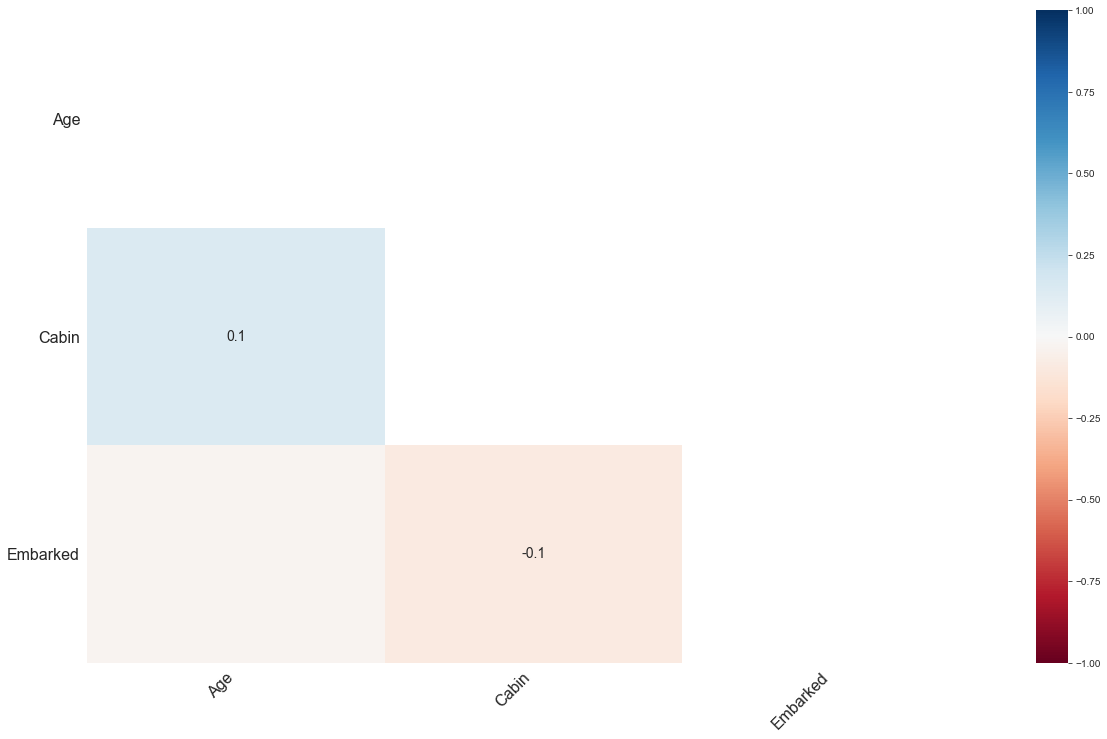

In [99]:
msno.heatmap(df)

In [100]:
#no much corrl b/w missing values : so the values of Age and Cabin are mostly MAR since ppl died no one left behind to give values 
#missing in particular subsets of data whereas embarked is very few and  MCAR (may be lost during data collection) #no realtion with the target

<AxesSubplot:>

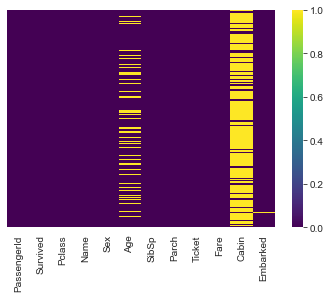

In [101]:
# same thing can be applied with
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap=plt.cm.viridis) #ytick: record num

In [102]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

#20% of Age data & 77% of Cabin is missing ; %of NA in embarked is very few and can be deleted since embarked has no corrl with survirved col
#so proprtion of age missing is small enough to be replaced by some imputation 
#cabin has too much missing >30% so we can drop it otr repkace NA by new category/ capture by 1and 0

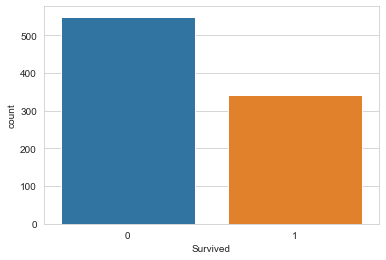

In [103]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = df) #representation of class col
plt.show()
#we can see >500 didnt make it alive and around 340 ppl survied

In [104]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

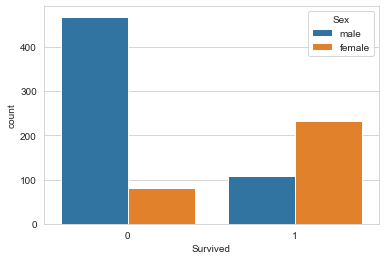

In [105]:
# target wrt Gender
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = df, hue='Sex') #representation of class col wrt gender
plt.show()
#more males died than feamles 
#surbvival rate is ore in feamales which we saw in movie also since they were rescued by boats

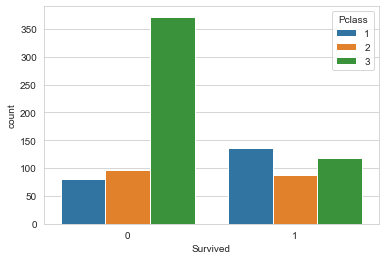

In [106]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = df, hue='Pclass') #representation of class col wrt pclass
plt.show()
#pclass 3 died most since they / that were beneath the boat lower cabin water filled 1st and fast
#followed by 2 and last 1 upper decks
#survival rate of class 1 is high

In [107]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

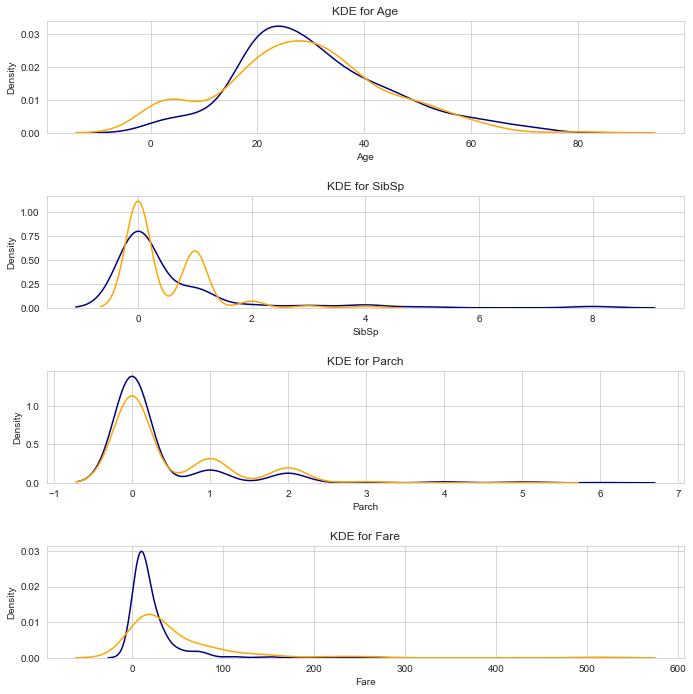

In [108]:
col=[ 'Age', 'SibSp','Parch','Fare']
#distn of each
fig, ax = plt.subplots(len(col), figsize=(10,10))
for i, cols in enumerate(col):
    sns.kdeplot(df[df['Survived'] == 0][cols].dropna(), color= 'navy',  ax=ax[i], label= {'survived': 'No'})
    sns.kdeplot(df[df['Survived'] == 1][cols].dropna(), color= 'orange',  ax=ax[i], label={'survived': 'Yes'})
    ax[i].set_title('KDE for {}'.format(cols))
plt.tight_layout(pad=2)
plt.show()
#age around 15 - 35 died more than who survived for ame range as compare to infants and elders 
#ppl with no or 1 sibsp survived more 
#ppl who died had either no or 1 parch
#ppl with low fares died more [probably lower deck ppl]

<AxesSubplot:xlabel='Age', ylabel='Count'>

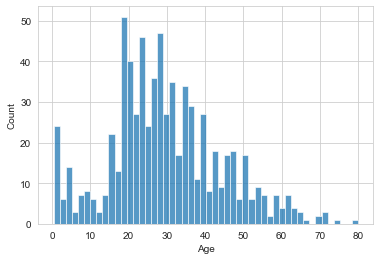

In [109]:
sns.histplot(df['Age'].dropna(), bins=50, kde=False) #count of ppl in each age bin
#max no ppl were arond 17-30 age
#no of infants/teens b/w 1 -15 are more than elders, whic were least boarded
#age kinf of follows a ND with few outliers 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

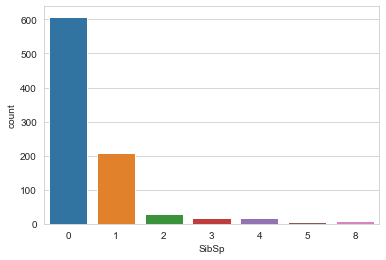

In [110]:
sns.countplot(x='SibSp', data= df) #more ppl boarded had no SibSp around 600 out of total
#around 200 had 1 SibSp : 1 is basically with spouse no one would trvel w/o it

<AxesSubplot:>

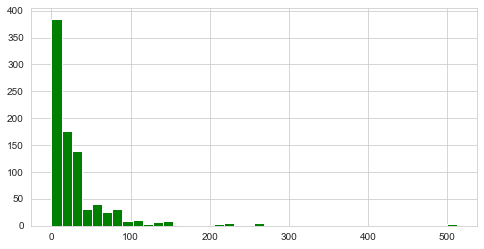

In [111]:
df['Fare'].hist(color='green', bins=40, figsize=(8,4))
#more ppl boarded paid low fare b/w 0-100$;  ppl who paid high fare very rare

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## DATA CLEANING or FE

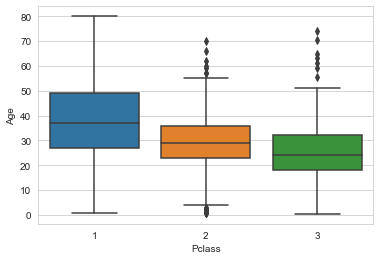

In [113]:
# Age : either median impute or be smarter and see Age wrt pclass does it have anny relation
sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()
# so we see that avg age rich ppl in high class > than rest, they tend to be older than rest; which makes sense young ppl still earning
#so we will imputre NA in age by these avg values wrt pclass
#ppl in pclass 1 have avg age around 37
#in pclass 2v have avg age around 29 and in pclass 3 has around 17

In [114]:
def impute_nan(var):
    Age =var[0]
    Pclass =var[1] #age is 1st col and pclass in 2nd #since there are 2 variables involved we use this indication
    
    if pd.isnull(Age): #if a row has NA in age
        if Pclass ==1: # and if in that row for the NA ,pclass is 1
            #wherever in Age there is null and for those records if  passengfer belongs to Pclass ==1, replace those by avg age of ppl in pclass 1 =37
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
        
    else: #non null records of age
        return Age

In [115]:
#no apply this function on Age using apply on each records
df['Age'] = df[['Age', 'Pclass']].apply(impute_nan, axis=1)
#each col ke liye each record wise taking both into consideration

<AxesSubplot:>

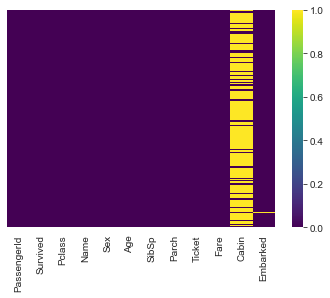

In [116]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap=plt.cm.viridis) #ytick: record num
#age has no na values

In [117]:
#now lets treat cabin values
df.Cabin.nunique()

147

In [118]:
df['Cabin'] = np.where(df.Cabin.isnull(),'Missing', df['Cabin'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S


<AxesSubplot:>

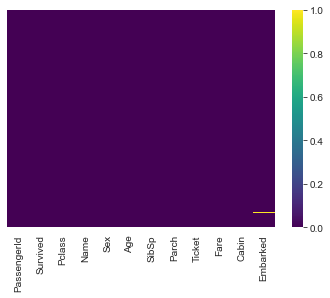

In [119]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap=plt.cm.viridis)

In [120]:
df.shape

(891, 12)

In [121]:
df.dropna(inplace=True) #dropped the 2 rows of embarked missing
df.shape

(889, 12)

## Encoding of Categorical Variables

In [122]:
df['Cabin'] =df['Cabin'].astype(str).str[0]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S


In [123]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [124]:
#target guided encoding
labels = df.groupby('Cabin')['Survived'].mean().sort_values().index
labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [125]:
df.groupby('Cabin')['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.733333
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [126]:
label_num = {k:v for v,k in enumerate(labels)}
label_num

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [127]:
df['Cabin'] = df['Cabin'].map(label_num)

In [128]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,4,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,4,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S


In [129]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [130]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [131]:
df.drop(['Sex', 'Name', 'Ticket','Embarked'], axis=1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,4
2,3,1,3,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,4
4,5,0,3,35.0,0,0,8.0500,1


In [133]:
df= pd.concat([df, sex, embark], axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,4,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,4,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,1,0,1


In [134]:
# Great now are data is ready lets build a log reg model
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=0)
X_train.shape , X_test.shape

((622, 10), (267, 10))

In [135]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

C:\Users\Snehal Sanap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()